Estimating the Alfven Mach Number ($M_A$) using the three methods reported in [Maguire et al. (2020)](https://www.aanda.org/articles/aa/full_html/2020/01/aa36449-19/aa36449-19.html)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import logging
import sunpy
sunpy.log.setLevel(logging.WARNING) # Set SunPy's logger to only show WARNING or above

import os
import glob
import numpy as np
import pandas as pd
from datetime import datetime
import sunpy
from sunpy.map import Map
from sunpy.coordinates import sun
from sunpy.coordinates import frames
from sunpy.coordinates import SphericalScreen
from sunpy.sun import constants as const
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.dates import DateFormatter
import astropy.units as u
import astropy.io.fits as fits
import astropy.constants as astro_const
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize, LogStretch, PercentileInterval

# Construct the full path to the scripts directory
script_path = os.path.abspath('./scripts')

# Add the scripts directory to sys.path
import sys
if script_path not in sys.path:
    sys.path.append(script_path)

import fwdtools as fwd
import solar_data_utils as myfuncs
# Reload to update with new changes
import importlib
importlib.reload(fwd)
importlib.reload(myfuncs)

# import seaborn as sns
# sns.set_theme(style='ticks')
# sns.set_context('paper')

# set the directory path where the data is importe/stored
data_dir = '/home/mnedal/data'

### Load SUVI images

In [2]:
suvi_map_objects  = myfuncs.load_suvi(data_dir=data_dir,
                                      start='2024-05-14T17:00:00',
                                      end='2024-05-14T18:00:00',
                                      channel=195)                  # load SUVI data files
clean_suvi_maps   = myfuncs.remove_redundant_maps(suvi_map_objects) # remove redundant images
suvi_seq_runratio = myfuncs.apply_runratio(clean_suvi_maps)         # make running ratio maps

for m in suvi_seq_runratio:
    m.plot_settings['norm'] = colors.Normalize(vmin=0.7, vmax=1.3)  # normalize the intensity range

SUVI image 0 is done
SUVI image 1 is done
SUVI image 2 is done
SUVI image 3 is done
SUVI image 4 is done
SUVI image 5 is done
SUVI image 6 is done
SUVI image 7 is done
SUVI image 8 is done
SUVI image 9 is done
SUVI image 10 is done
SUVI image 11 is done
SUVI image 12 is done
SUVI image 13 is done
SUVI image 14 is done
SUVI image 15 is done
SUVI image 16 is done
SUVI image 17 is done
SUVI image 18 is done
SUVI image 19 is done
SUVI image 20 is done
SUVI image 21 is done


### Load LASCO C2 images

In [3]:
lasco_c2_map_objects = myfuncs.load_lasco(data_dir=data_dir,
                                          start='2024-05-14T17:30:00',
                                          end='2024-05-14T20:00:00',
                                          detector='C2')                   # load LASCO C2 data files
clean_maps_c2        = myfuncs.remove_redundant_maps(lasco_c2_map_objects) # remove redundant images
m_seq_runratio_c2    = myfuncs.apply_runratio(clean_maps_c2)               # make running ratio maps

print(f'Before:\nLASCO C2: {len(lasco_c2_map_objects)} images\n')
print(f'After:\nLASCO C2: {len(clean_maps_c2)} images')

LASCO C2 image 0 is done
LASCO C2 image 1 is done
LASCO C2 image 2 is done
LASCO C2 image 3 is done
LASCO C2 image 4 is done
LASCO C2 image 5 is done
LASCO C2 image 6 is done
LASCO C2 image 7 is done
LASCO C2 image 8 is done
LASCO C2 image 9 is done
LASCO C2 image 10 is done
LASCO C2 image 11 is done
LASCO C2 image 12 is done
LASCO C2 image 13 is done
LASCO C2 image 14 is done
LASCO C2 image 15 is done
LASCO C2 image 16 is done
LASCO C2 image 17 is done
LASCO C2 image 18 is done
LASCO C2 image 19 is done
LASCO C2 image 20 is done
LASCO C2 image 21 is done
LASCO C2 image 22 is done
LASCO C2 image 23 is done
LASCO C2 image 24 is done
LASCO C2 image 25 is done
LASCO C2 image 26 is done
LASCO C2 image 27 is done
LASCO C2 image 28 is done
LASCO C2 image 29 is done
LASCO C2 image 30 is done
LASCO C2 image 31 is done
LASCO C2 image 32 is done
LASCO C2 image 33 is done
LASCO C2 image 34 is done
LASCO C2 image 35 is done
LASCO C2 image 36 is done
LASCO C2 image 37 is done
LASCO C2 image 38 is d

### Preview maps

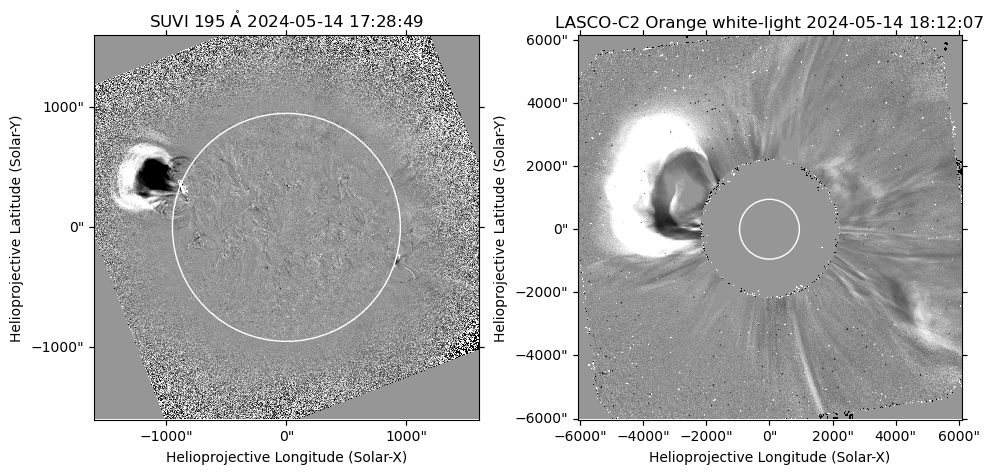

In [4]:
m_suvi = suvi_seq_runratio[6]
m_c2   = m_seq_runratio_c2[3]

fig = plt.figure(figsize=[10,5])

ax  = fig.add_subplot(121, projection=m_suvi)
m_suvi.plot(axes=ax)
m_suvi.draw_limb()
ax.grid(False)

ax  = fig.add_subplot(122, projection=m_c2)
m_c2.plot(axes=ax)
m_c2.draw_limb()
ax.grid(False)

fig.tight_layout()
plt.show()

### Show the radial slits

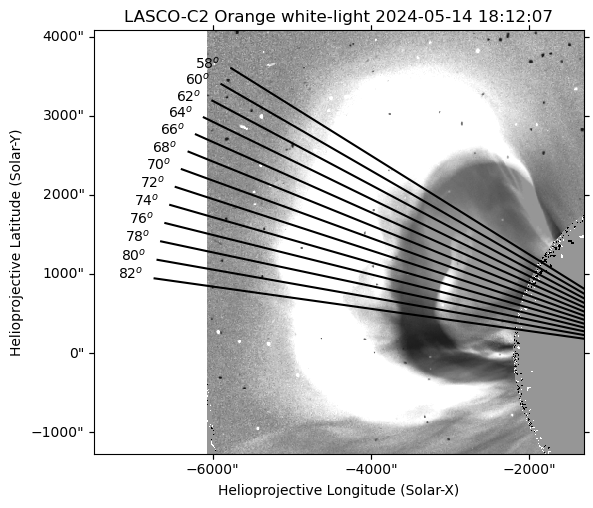

In [5]:
centered_list = myfuncs.generate_centered_list(160, 2, 6)

fig = plt.figure(figsize=[10,10])
ax  = fig.add_subplot(111, projection=m_c2)
img = m_c2.plot(axes=ax)
m_c2.draw_limb()
ax.grid(False)

for value in centered_list:
    line = myfuncs.plot_line(angle_deg=value, length=6800, map_obj=m_c2)
    ax.plot_coord(line, color='black')
    # Plot the number at the end of the line
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = m_c2.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=m_c2.coordinate_frame))
    # rename the angles to be position angles, instead of geometric angles
    PA_value = value - 90
    # Display the number at the end point
    ax.text(end_point_pixel.x.value - 25, end_point_pixel.y.value + 5, f'{PA_value}$^o$',
            color='black', fontsize=10, ha='center', va='center')

ax.set_xlim(left=-120, right=400)
ax.set_ylim(bottom=400, top=850)
fig.tight_layout()
plt.show()

### Load PSI-MAS FORWARD maps

In [6]:
file_paths = sorted(glob.glob(f'{data_dir}/FORWARD/*.sav'))
print(*file_paths, sep='\n')

/home/mnedal/data/FORWARD/AIA_20240514_1710_193_512_rfilter.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_BETA_2460559.9840394disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_BMAG_2460559.9356944disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_DENS_2460559.9343750disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_PTOT_2460559.9832407disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_TEMP_2460559.9822801disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_VPH_2460593.4820486disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_VR_2460593.4744676disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_VTH_2460593.4788194disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_VX_2460593.5005556disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_VY_2460593.5060301disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_VZ_2460593.5081481disk.sav


In [7]:
for file in file_paths:
    if 'BMAG' in file:
        bmag = myfuncs.get_forward_map(file)
    elif 'DENS' in file:
        dens = myfuncs.get_forward_map(file)
    elif 'BETA' in file:
        beta = myfuncs.get_forward_map(file)
    elif 'TEMP' in file:
        temp = myfuncs.get_forward_map(file)
    elif 'BR' in file:
        br = myfuncsget_forward_map(file)
    elif 'VX' in file:
        vx = myfuncs.get_forward_map(file)
    elif 'VY' in file:
        vy = myfuncs.get_forward_map(file)
    elif 'VZ' in file:
        vz = myfuncs.get_forward_map(file)

### Check the 3 speed coponents (Vx, Vy, Vz)

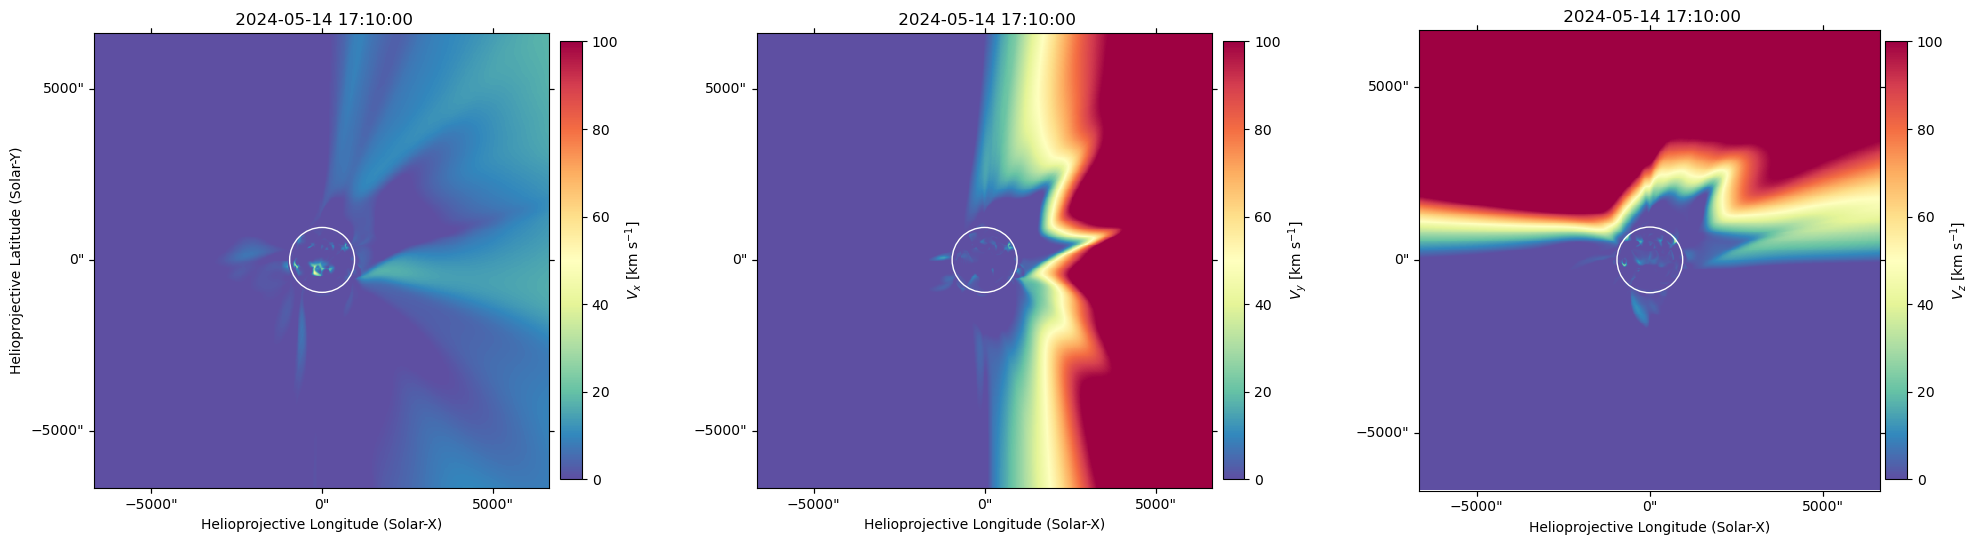

In [232]:
max_range = 100
min_range = 0

fig = plt.figure(figsize=[20,7])

ax  = fig.add_subplot(131, projection=vx)
img = vx.plot(axes=ax, vmin=min_range, vmax=max_range, cmap='Spectral_r')
vx.draw_limb()
ax.grid(False)
plt.colorbar(img, ax=ax, shrink=0.7, pad=0.02, label='$V_x$ [km s$^{-1}$]')

ax  = fig.add_subplot(132, projection=vy)
img = vy.plot(axes=ax, vmin=min_range, vmax=max_range, cmap='Spectral_r')
vy.draw_limb()
ax.grid(False)
plt.colorbar(img, ax=ax, shrink=0.7, pad=0.02, label='$V_y$ [km s$^{-1}$]')
ax.set_ylabel(' ')

ax  = fig.add_subplot(133, projection=vz)
img = vz.plot(axes=ax, vmin=min_range, vmax=max_range, cmap='Spectral_r')
vz.draw_limb()
ax.grid(False)
plt.colorbar(img, ax=ax, shrink=0.7, pad=0.01, label='$V_z$ [km s$^{-1}$]')
ax.set_ylabel(' ')

fig.tight_layout()
plt.show()

In [254]:
# Calculate the Alfven speed map
mp        = astro_const.m_p.to(u.gram).value
valf_cm_s = bmag.data/np.sqrt(4*np.pi*mp*dens.data)
valf_km_s = valf_cm_s * 1e-5
va        = sunpy.map.Map(valf_km_s, dens.meta)

# Calculate plasma speed
vsw_arr = np.sqrt(vx.data**2 + vy.data**2 + vz.data**2)
vsw     = sunpy.map.Map(vsw_arr, vx.meta)

# Calculate Alfven Mach number
Ma_arr = vsw.data / va.data
Ma     = sunpy.map.Map(Ma_arr, vsw.meta)

### Check the 3 maps (Vsw, Va, Ma)

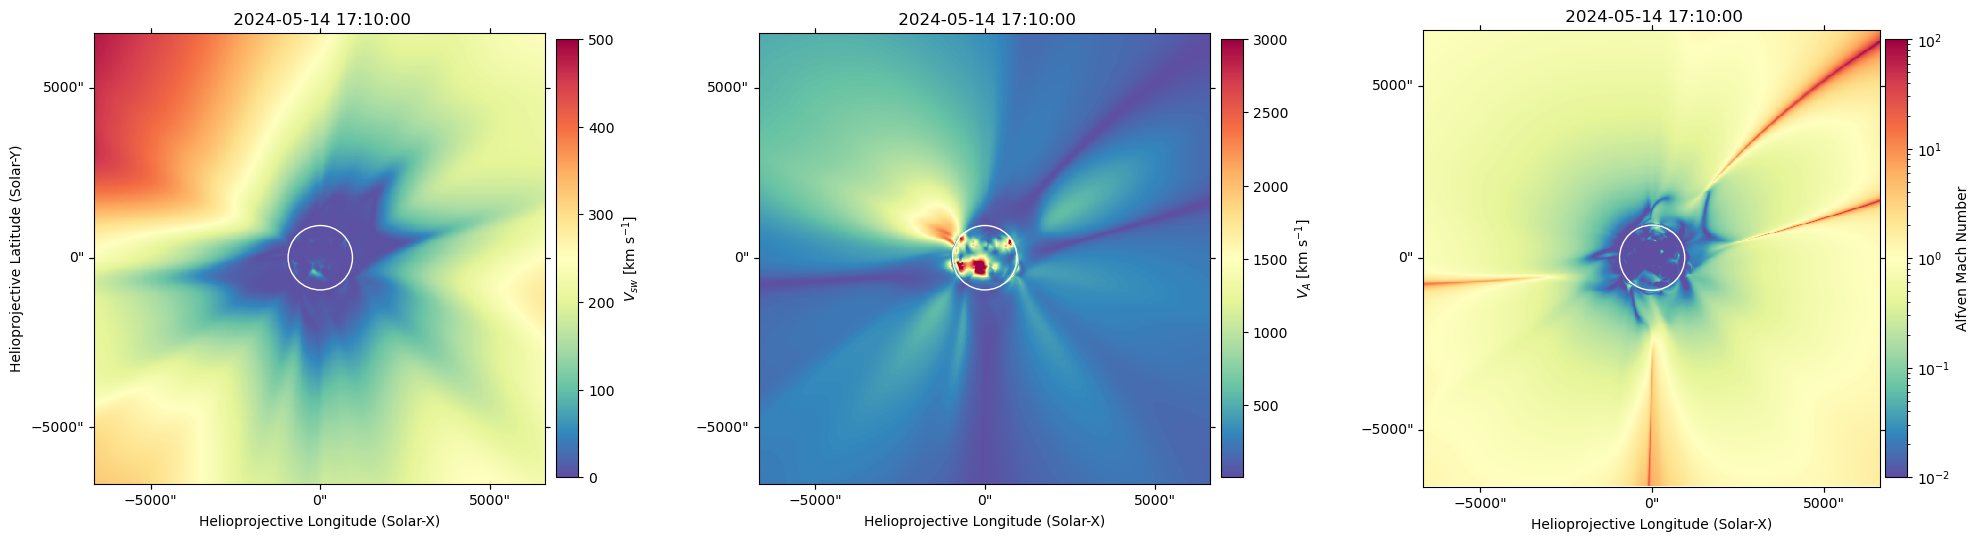

In [255]:
fig = plt.figure(figsize=[20,7])

ax  = fig.add_subplot(131, projection=vsw)
img = vsw.plot(axes=ax, vmin=0, vmax=500, cmap='Spectral_r')
vsw.draw_limb()
ax.grid(False)
plt.colorbar(img, ax=ax, shrink=0.7, pad=0.02, label='$V_{sw}$ [km s$^{-1}$]')

ax  = fig.add_subplot(132, projection=va)
img = va.plot(axes=ax, vmin=1e1, vmax=3e3, cmap='Spectral_r')
va.draw_limb()
ax.grid(False)
plt.colorbar(img, ax=ax, shrink=0.7, pad=0.02, label='$V_A$ [km s$^{-1}$]')
ax.set_ylabel(' ')

ax  = fig.add_subplot(133, projection=Ma)
img = Ma.plot(axes=ax,
              norm=colors.LogNorm(vmin=0.01, vmax=100),
              cmap='Spectral_r')
Ma.draw_limb()
ax.grid(False)
plt.colorbar(img, ax=ax, shrink=0.7, pad=0.01, label='Alfven Mach Number')
ax.set_ylabel(' ')

fig.tight_layout()
plt.show()

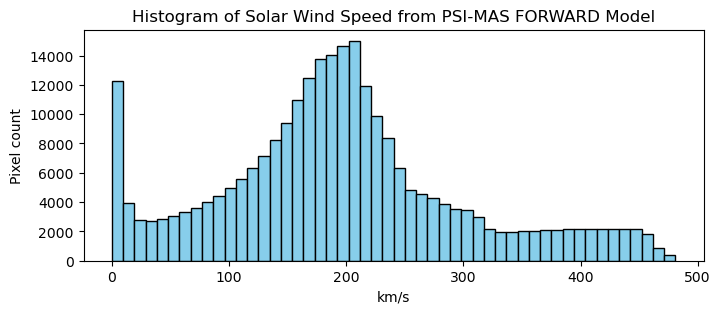

In [256]:
data = vsw.data.flatten()

plt.figure(figsize=[8,3])
plt.hist(data, bins=50, log=False, color='skyblue', edgecolor='k')
plt.xlabel('km/s')
plt.ylabel('Pixel count')
plt.title('Histogram of Solar Wind Speed from PSI-MAS FORWARD Model')
plt.show()

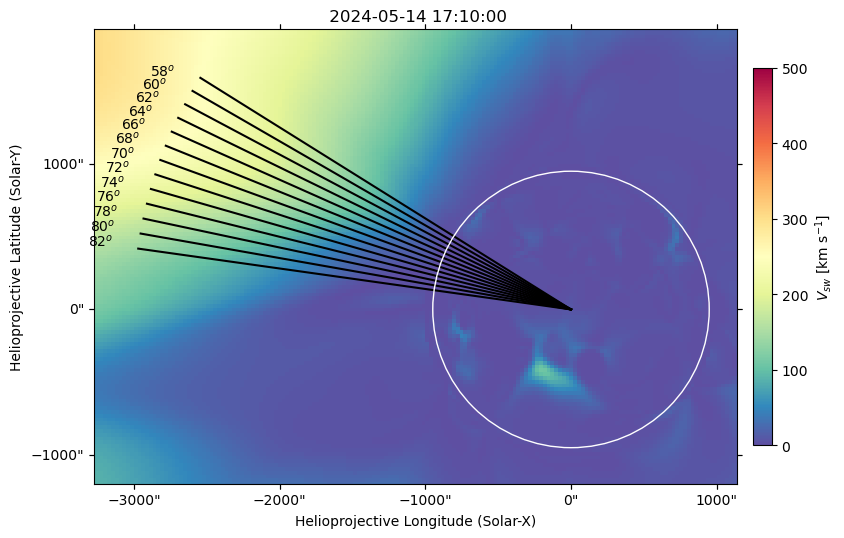

In [227]:
fig = plt.figure(figsize=[10,7])
ax  = fig.add_subplot(projection=vsw)
img = vsw.plot(axes=ax, vmin=0, vmax=500, cmap='Spectral_r')
vsw.draw_limb()
ax.grid(False)
plt.colorbar(img, ax=ax, shrink=0.7, pad=0.02, label='$V_{sw}$ [km s$^{-1}$]')

sampled_vsw  = []
sampled_dist = []

for value in centered_list:
    line = myfuncs.plot_line(angle_deg=value, length=3000, map_obj=vsw)
    ax.plot_coord(line, color='black')
    # Plot the number at the end of the line
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = vsw.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=vsw.coordinate_frame))
    # rename the angles to be position angles, instead of geometric angles
    PA_value = value - 90
    # Display the number at the end point
    ax.text(end_point_pixel.x.value-10, end_point_pixel.y.value+2, rf'{PA_value}$^o$',
            color='black', fontsize=10, ha='center', va='center')

    # sample values along slits
    with SphericalScreen(vsw.observer_coordinate):
        traced_loop_pixelated = sunpy.map.pixelate_coord_path(vsw, line)
        traced_loop_distance = traced_loop_pixelated.separation(traced_loop_pixelated[0])
    vals = sunpy.map.sample_at_coords(vsw, traced_loop_pixelated)
    sampled_vsw.append(vals)
    sampled_dist.append(traced_loop_distance.to('arcsec'))

ax.set_xlim(left=130, right=300)
ax.set_ylim(bottom=210, top=330)
fig.tight_layout()
plt.show()

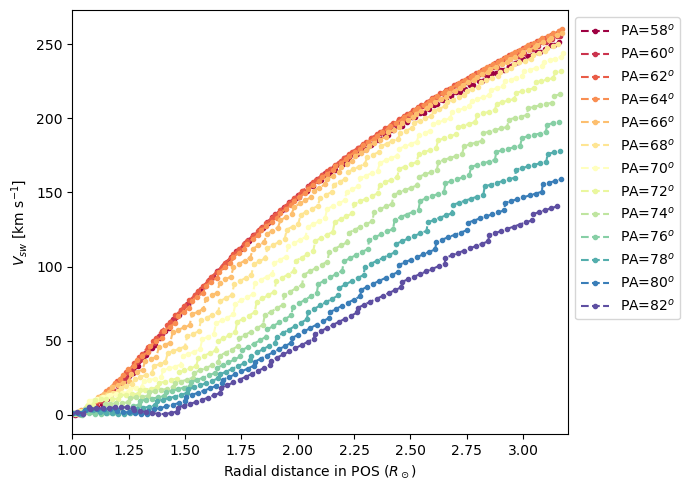

In [225]:
fig = plt.figure(figsize=[7,5])
ax  = fig.add_subplot(111)

# Choose a colormap with many distinguishable colors
cmap           = plt.cm.get_cmap('Spectral')
num_lines      = len(sampled_vsw)
colors_list    = cmap(np.linspace(0, 1, num_lines))

for i in range(len(sampled_vsw)):
    # rename the angles to be position angles, instead of geometric angles
    PA_value = centered_list[i] - 90
    ax.plot(sampled_dist[i]/vsw.rsun_obs.value, sampled_vsw[i],
            'o--', ms=3, color=colors_list[i], label=rf'PA={PA_value}$^o$')

ax.grid(False)
ax.legend(bbox_to_anchor=[1, 1])
ax.set_xlabel(r'Radial distance in POS ($R_\odot$)')
ax.set_ylabel(r'$V_{sw}$ [km s$^{-1}$]')
ax.set_xlim(left=1, right=3.2)
fig.tight_layout()
plt.show()

### Trace Alfven speed along the slits

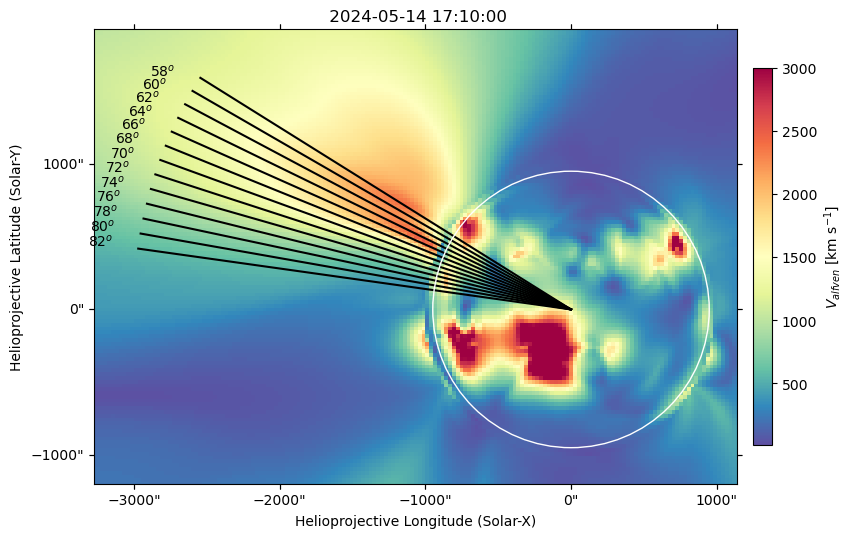

In [237]:
fig = plt.figure(figsize=[10,7])
ax  = fig.add_subplot(projection=va)
img = va.plot(axes=ax, vmin=1e1, vmax=3e3, cmap='Spectral_r')
va.draw_limb()
ax.grid(False)
plt.colorbar(img, ax=ax, shrink=0.7, pad=0.02, label=r'$V_{alfven}$ [km s$^{-1}$]')

sampled_va   = []
sampled_dist = []

for value in centered_list:
    line = myfuncs.plot_line(angle_deg=value, length=3000, map_obj=va)
    ax.plot_coord(line, color='black')
    # Plot the number at the end of the line
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = va.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=va.coordinate_frame))
    # rename the angles to be position angles, instead of geometric angles
    PA_value = value - 90
    # Display the number at the end point
    ax.text(end_point_pixel.x.value-10, end_point_pixel.y.value+2, rf'{PA_value}$^o$',
            color='black', fontsize=10, ha='center', va='center')

    # sample values along slits
    with SphericalScreen(vsw.observer_coordinate):
        traced_loop_pixelated = sunpy.map.pixelate_coord_path(va, line)
        traced_loop_distance = traced_loop_pixelated.separation(traced_loop_pixelated[0])
    vals = sunpy.map.sample_at_coords(va, traced_loop_pixelated)
    sampled_va.append(vals)
    sampled_dist.append(traced_loop_distance.to('arcsec'))

ax.set_xlim(left=130, right=300)
ax.set_ylim(bottom=210, top=330)
fig.tight_layout()
plt.show()

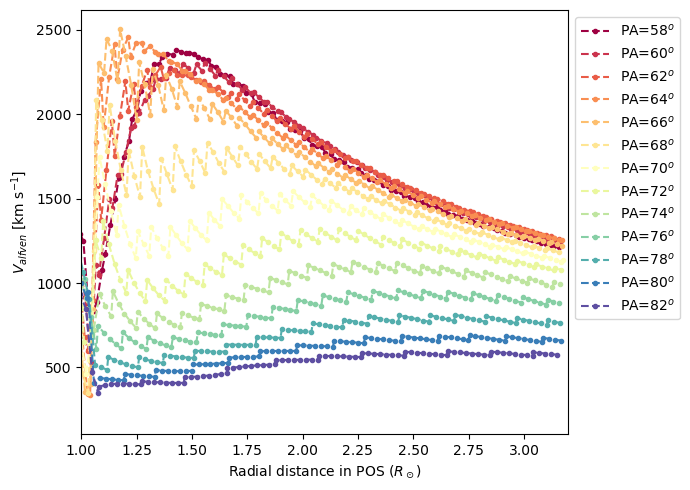

In [241]:
fig = plt.figure(figsize=[7,5])
ax  = fig.add_subplot(111)

# Choose a colormap with many distinguishable colors
cmap           = plt.cm.get_cmap('Spectral')
num_lines      = len(sampled_va)
colors_list    = cmap(np.linspace(0, 1, num_lines))

for i in range(len(sampled_va)):
    # rename the angles to be position angles, instead of geometric angles
    PA_value = centered_list[i] - 90
    ax.plot(sampled_dist[i]/va.rsun_obs.value, sampled_va[i],
            'o--', ms=3, color=colors_list[i], label=rf'PA={PA_value}$^o$')

ax.grid(False)
ax.legend(bbox_to_anchor=[1, 1])
ax.set_xlabel(r'Radial distance in POS ($R_\odot$)')
ax.set_ylabel(r'$V_{alfven}$ [km s$^{-1}$]')
ax.set_xlim(left=1, right=3.2)
fig.tight_layout()
plt.show()

### Trace plasma density along the slits

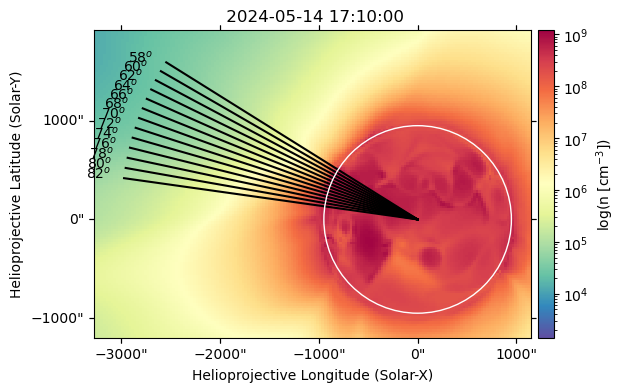

In [226]:
fig = plt.figure(figsize=[10,4])
ax  = fig.add_subplot(projection=dens)
img = dens.plot(axes=ax,
                norm=colors.LogNorm(),
                cmap='Spectral_r')
dens.draw_limb()
ax.grid(False)
plt.colorbar(img, ax=ax, pad=0.01, label=r'log(n [cm$^{-3}$])')

sampled_dens = []
sampled_dist = []

for value in centered_list:
    line = myfuncs.plot_line(angle_deg=value, length=3000, map_obj=dens)
    ax.plot_coord(line, color='black')
    # Plot the number at the end of the line
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = dens.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=dens.coordinate_frame))
    # rename the angles to be position angles, instead of geometric angles
    PA_value = value - 90
    # Display the number at the end point
    ax.text(end_point_pixel.x.value-10, end_point_pixel.y.value+2, rf'{PA_value}$^o$',
            color='black', fontsize=10, ha='center', va='center')

    # sample values along slits
    with SphericalScreen(dens.observer_coordinate):
        traced_loop_pixelated = sunpy.map.pixelate_coord_path(dens, line)
        traced_loop_distance = traced_loop_pixelated.separation(traced_loop_pixelated[0])
    vals = sunpy.map.sample_at_coords(dens, traced_loop_pixelated)
    sampled_dens.append(vals)
    sampled_dist.append(traced_loop_distance.to('arcsec'))

ax.set_xlim(left=130, right=300)
ax.set_ylim(bottom=210, top=330)
fig.tight_layout()
plt.show()

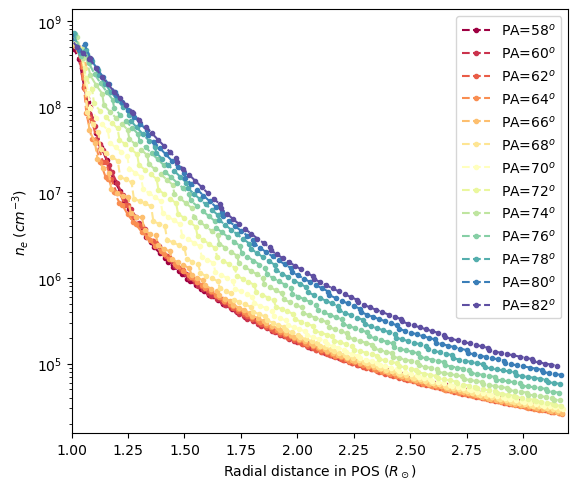

In [31]:
fig = plt.figure(figsize=[7,5])
ax  = fig.add_subplot(111)

# Choose a colormap with many distinguishable colors
cmap           = plt.cm.get_cmap('Spectral')
num_lines      = len(sampled_dens)
colors_list    = cmap(np.linspace(0, 1, num_lines))

for i in range(len(sampled_dens)):
    # rename the angles to be position angles, instead of geometric angles
    PA_value = centered_list[i] - 90
    ax.plot(sampled_dist[i]/dens.rsun_obs.value, sampled_dens[i],
            'o--', ms=3, color=colors_list[i], label=rf'PA={PA_value}$^o$')
    ax.set_yscale('log')

ax.grid(False)
ax.legend(bbox_to_anchor=[1, 1])
ax.set_xlabel(r'Radial distance in POS ($R_\odot$)')
ax.set_ylabel(r'$n_e\;(cm^{-3})$')
ax.set_xlim(left=1, right=3.2)
fig.tight_layout()
plt.show()

### Trace Alfven Mach number along the slits

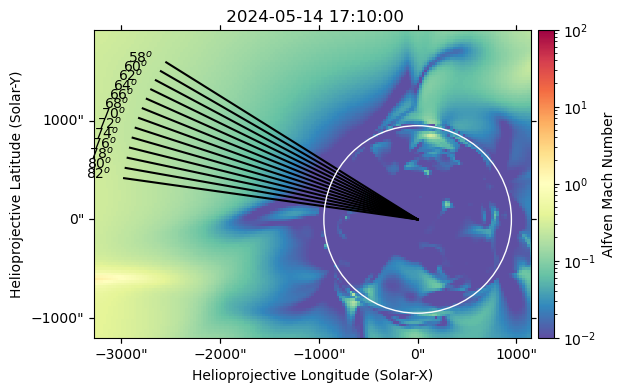

In [124]:
fig = plt.figure(figsize=[10,4])
ax  = fig.add_subplot(projection=Ma)
img = Ma.plot(axes=ax,
              norm=colors.LogNorm(vmin=0.01, vmax=100),
              cmap='Spectral_r')
Ma.draw_limb()
ax.grid(False)
plt.colorbar(img, ax=ax, pad=0.01, label='Alfven Mach Number')

sampled_Ma   = []
sampled_dist = []

for value in centered_list:
    line = myfuncs.plot_line(angle_deg=value, length=3000, map_obj=Ma)
    ax.plot_coord(line, color='black')
    # Plot the number at the end of the line
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = Ma.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=Ma.coordinate_frame))
    # rename the angles to be position angles, instead of geometric angles
    PA_value = value - 90
    # Display the number at the end point
    ax.text(end_point_pixel.x.value-10, end_point_pixel.y.value+2, rf'{PA_value}$^o$',
            color='black', fontsize=10, ha='center', va='center')

    # sample values along slits
    with SphericalScreen(dens.observer_coordinate):
        traced_loop_pixelated = sunpy.map.pixelate_coord_path(Ma, line)
        traced_loop_distance = traced_loop_pixelated.separation(traced_loop_pixelated[0])
    vals = sunpy.map.sample_at_coords(Ma, traced_loop_pixelated)
    sampled_Ma.append(vals)
    sampled_dist.append(traced_loop_distance.to('arcsec'))

ax.set_xlim(left=130, right=300)
ax.set_ylim(bottom=210, top=330)
fig.tight_layout()
plt.show()

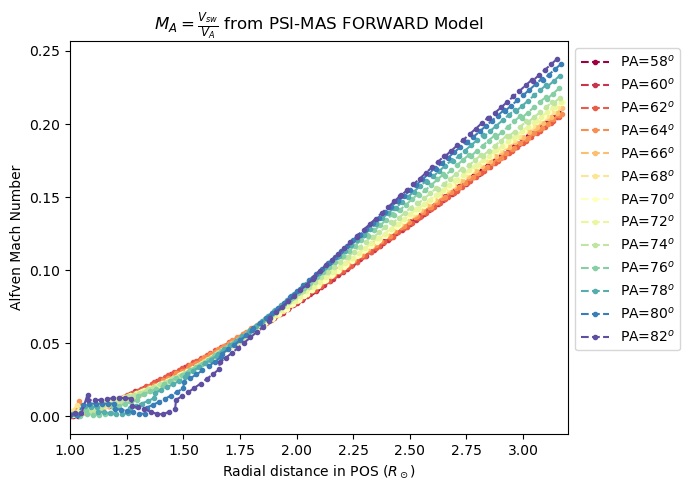

In [282]:
fig = plt.figure(figsize=[7,5])
ax  = fig.add_subplot(111)

# Choose a colormap with many distinguishable colors
cmap           = plt.cm.get_cmap('Spectral')
num_lines      = len(sampled_Ma)
colors_list    = cmap(np.linspace(0, 1, num_lines))

for i in range(len(sampled_dens)):
    # rename the angles to be position angles, instead of geometric angles
    PA_value = centered_list[i] - 90
    ax.plot(sampled_dist[i]/Ma.rsun_obs.value, sampled_Ma[i],
            'o--', ms=3, color=colors_list[i], label=rf'PA={PA_value}$^o$')

ax.grid(False)
ax.legend(bbox_to_anchor=[1, 1])
ax.set_xlabel(r'Radial distance in POS ($R_\odot$)')
ax.set_ylabel('Alfven Mach Number')
plt.title(r'$M_A=\frac{V_{sw}}{V_A}$ from PSI-MAS FORWARD Model')
ax.set_xlim(left=1, right=3.2)
fig.tight_layout()
plt.show()

### Estimate the Alfven Mach Number with three methods

## Method 1: Standoff distance

In [62]:
def fit_circle(m=m, angle=160, x=-1000, r=200):
    """
    Fit circle on CME in EUV images.
    ------------------------------------
    Inputs:
    =======
    m: sunpy map.
    angle: in degrees counterclockwise from the solar west limb.
    x: shift of the circle's center on x-axis.
    r: circle's radius.
    ------------------------------------
    Outputs:
    central_line: slit centered on the active region location.
    circle_coords: circle's points.
    center_coord: circle's center point.
    """    
    # Define center coordinate x in arcseconds, e.g., Helioprojective
    x = x * u.arcsec
    r = r * u.arcsec  # Radius of the circle
    
    # Define AR location in HeliographicStonyhurst: N17 = +17°, E72 = -72°
    lat = 17 * u.deg           # North
    lon = -72 * u.deg          # East is negative in Stonyhurst
    # Make SkyCoord for the center in HeliographicStonyhurst
    center_hgs = SkyCoord(lon, lat, frame=frames.HeliographicStonyhurst,
                          observer=m.observer_coordinate, obstime=m.date)
    # Transform to map coordinate frame (usually Helioprojective)
    center_coord = center_hgs.transform_to(m.coordinate_frame)
    # Define the central line across the circle
    central_angle       = angle # e.g., 160 >> PA = 70 deg.
    central_line_length = 800
    central_line        = myfuncs.plot_line(angle_deg=central_angle,
                                            length=central_line_length,
                                            start_point=center_coord.Tx.value,
                                            end_point=center_coord.Ty.value,
                                            map_obj=m)
    # rename the angles to be position angles, instead of geometric angles
    PA_value = central_angle - 90
    # Find the y point for the circle's center to intersect with the central line
    x1, x2 = central_line.Tx[0].value, central_line.Tx[1].value
    y1, y2 = central_line.Ty[0].value, central_line.Ty[1].value
    # Linear interpolation
    y = y1 + (y2 - y1) / (x2 - x1) * (x.value - x1)
    # Define center coordinate yin arcseconds, e.g., Helioprojective
    y = y * u.arcsec
    # Define angles to draw the circle
    theta    = np.linspace(0, 2*np.pi, 500)
    circle_x = x + r*np.cos(theta)
    circle_y = y + r*np.sin(theta)
    # Convert to SkyCoord
    circle_coords = SkyCoord(circle_x, circle_y, frame=m.coordinate_frame)
    center_coord  = SkyCoord(x, y, frame=m.coordinate_frame)
    
    return (central_line, circle_coords, center_coord)

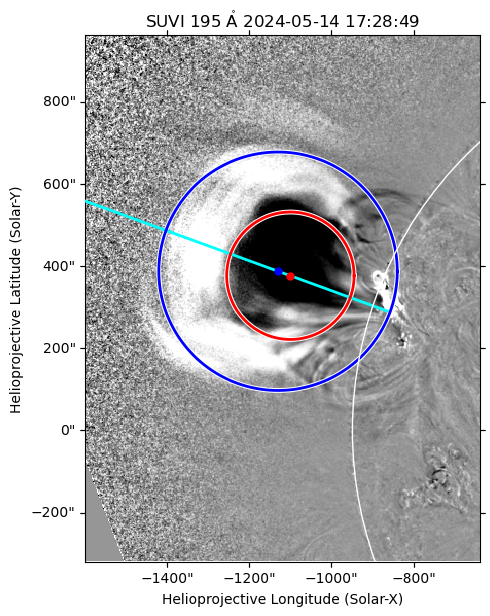

In [283]:
m        = suvi_seq_runratio[6]
r_shock  = 290
x_shock  = -1130
r_driver = 155
x_driver = -1100

# fig = plt.figure(figsize=[12,20])
fig = plt.figure(figsize=[5,10])
ax  = fig.add_subplot(projection=m)
m.plot(axes=ax)
m.draw_limb()
ax.grid(False)

# Plot the central slit, and circle with its center
central_line, circle_coords, center_coord = fit_circle(m=m, angle=160, x=x_driver, r=r_driver)

ax.plot_coord(central_line, c='cyan', ls='-', lw=2, zorder=10)
ax.plot_coord(circle_coords, c='w', lw=3.5)
ax.plot_coord(circle_coords, c='r', ls='-', lw=2, zorder=20)
ax.plot_coord(center_coord, c='r', marker='o', ms=5, zorder=20)

# Plot the central slit, and circle with its center
_, circle_coords, center_coord = fit_circle(m=m, angle=160, x=x_shock, r=r_shock)

ax.plot_coord(circle_coords, c='w', lw=3.5)
ax.plot_coord(circle_coords, c='b', ls='-', lw=2, zorder=20)
ax.plot_coord(center_coord, c='b', marker='o', ms=5, zorder=20)

# Adjust the boundaries
# crop 30% from the right
ax.set_xlim(left=0, right=m.dimensions.x.value*0.3)
# crop 40% from the bottom and 20% from the top
ax.set_ylim(bottom=m.dimensions.y.value*0.4, top=m.dimensions.y.value-m.dimensions.y.value*0.2)
fig.tight_layout()
plt.show()

In [108]:
gamma = 5/3                    # for an ideal mono-atomic gas
# gamma = 4/3                    # for an ideal mono-atomic relativistic gas

r_shock  = (r_shock*u.arcsec/m.rsun_obs)*u.solRad
r_driver = (r_driver*u.arcsec/m.rsun_obs)*u.solRad

delta = r_shock - r_driver     # standoff distance, from the EUV images
Rc    = r_driver               # radius of curvature of the CME, from the EUV images
d     = delta/Rc               # normalized standoff distance

MA_method1 = np.sqrt(1 + ( 1.24*d - (gamma-1)/(gamma+1) )**-1) # Russell & Mulligan (2002)
print(f'MA = {MA_method1:.2f}')

MA = 1.48


* MA = 1.485, for an ideal mono-atomic gas
* MA = 1.438, for an ideal mono-atomic relativistic gas

Method 2: CME speed to Alfvén speed ratio

In [279]:
i = 0                        # index of PA slit
vcme_val = 100               # CME speed
va_val   = sampled_va[i]     # local background Alfven speed
vsw_val  = sampled_vsw[i]    # Parker solution to the solar wind as in Mann et al. (2002) ... from the 2D plane-of-sky map of the MAS model

MA_method2 = (vcme_val - vsw_val)/va_val

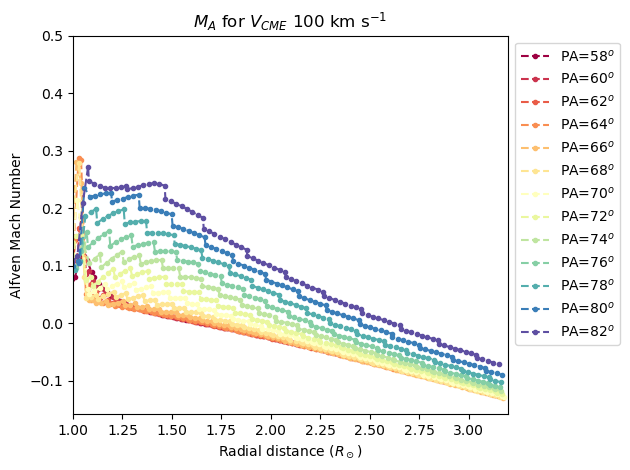

In [281]:
fig = plt.figure()
ax  = fig.add_subplot()

# Choose a colormap with many distinguishable colors
cmap           = plt.cm.get_cmap('Spectral')
num_lines      = len(sampled_va)
colors_list    = cmap(np.linspace(0, 1, num_lines))

for i in range(len(sampled_va)):
    # rename the angles to be position angles, instead of geometric angles
    PA_value = centered_list[i] - 90
    
    va_val   = sampled_va[i]     # local background Alfven speed
    vsw_val  = sampled_vsw[i]    # Parker solution to the solar wind as in Mann et al. (2002) ... from the 2D plane-of-sky map of the MAS model
    MA_method2 = (vcme_val - vsw_val)/va_val
    
    ax.plot(sampled_dist[i]/va.rsun_obs.value, MA_method2,
            'o--', ms=3, color=colors_list[i], label=rf'PA={PA_value}$^o$')

ax.grid(False)
ax.legend(bbox_to_anchor=[1, 1])
ax.set_xlabel(r'Radial distance ($R_\odot$)')
ax.set_ylabel('Alfven Mach Number')
ax.set_title(rf'$M_A$ for $V_{{CME}}$ {vcme_val} km s$^{{-1}}$')
ax.set_xlim(left=1, right=3.2)
ax.set_ylim(top=0.5)
fig.tight_layout()
plt.show()

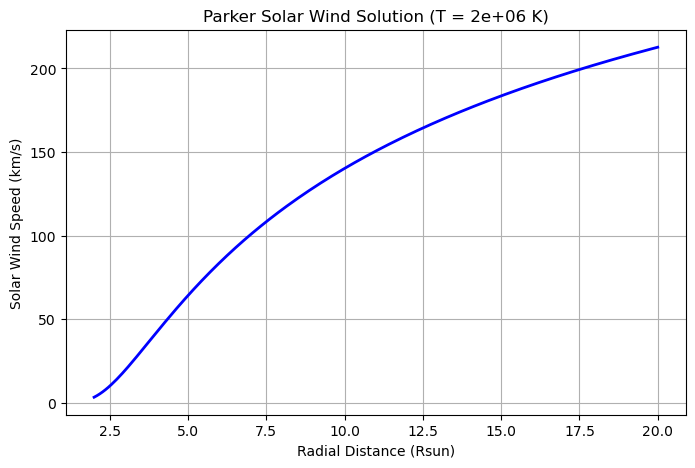

r = 2.00 Rsun, v = 3.3 km/s
r = 5.62 Rsun, v = 76.5 km/s
r = 9.24 Rsun, v = 131.5 km/s
r = 12.85 Rsun, v = 167.4 km/s
r = 16.47 Rsun, v = 193.2 km/s


In [184]:
from scipy.optimize import fsolve

def parker_solution(T, r_min=2, r_max=20, N=200):
    """
    Compute the Parker solar wind solution for an isothermal corona.
    
    Parameters:
      T    : Effective coronal temperature in Kelvin.
      r_min: Minimum radial distance in solar radii.
      r_max: Maximum radial distance in solar radii.
      N    : Number of points between r_min and r_max.
    
    Returns:
      r_vals: Radial distances in solar radii (array).
      v_vals: Solar wind speeds in km/s (array).
    """
    
    # Constants
    G = 6.67430e-11         # gravitational constant [m^3 kg^-1 s^-2]
    M_sun = 1.9885e30       # solar mass [kg]
    k_B = 1.380649e-23      # Boltzmann constant [J/K]
    m_p = 1.6726219e-27     # proton mass [kg]
    R_sun = 6.96e8          # solar radius in meters

    # Isothermal sound speed:
    c_s = np.sqrt(k_B * T / m_p)  # [m/s]
    
    # Critical radius: r_crit = GM/(2 c_s^2)
    r_crit = G * M_sun / (2 * c_s**2)
    
    # Parker equation: u^2 - ln(u^2) = 4*ln(r/r_crit) + 4*(r_crit/r) - 3, with u = v/c_s.
    def parker_equation(u, r):
        return u**2 - np.log(u**2) - (4 * np.log(r / r_crit) + 4 * (r_crit / r) - 3)
    
    def solve_u(r):
        # Use a very small initial guess if r is well below r_crit (subsonic),
        # and a larger guess when r is above r_crit (supersonic).
        if r < r_crit:
            u_guess = 1e-3
        else:
            u_guess = 2.0
        u_sol, info, ier, mesg = fsolve(parker_equation, u_guess, args=(r,), full_output=True)
        if ier != 1 or u_sol[0] <= 0:
            raise RuntimeError(f"At r = {r:.2e} m: {mesg}")
        return u_sol[0]
    
    # Create a radial grid in meters from r_min*R_sun to r_max*R_sun.
    r_vals = np.linspace(r_min * R_sun, r_max * R_sun, N)
    v_vals = np.array([solve_u(r) * c_s for r in r_vals])
    
    # Return r in solar radii and v in km/s.
    return r_vals / R_sun, v_vals / 1e3

# Choose an effective temperature. Try T = 2e6 K.
T_effective = 1.5e6  # Kelvin

r_plot, v_plot = parker_solution(T_effective, r_min=2, r_max=20, N=200)

plt.figure(figsize=(8, 5))
plt.plot(r_plot, v_plot, 'b-', lw=2)
plt.xlabel('Radial Distance (Rsun)')
plt.ylabel('Solar Wind Speed (km/s)')
plt.title(f'Parker Solar Wind Solution (T = {T_effective:.0e} K)')
plt.grid(True)
plt.show()

# Print a few sample values:
for r_val, v_val in zip(r_plot[::40], v_plot[::40]):
    print(f"r = {r_val:.2f} Rsun, v = {v_val:.1f} km/s")

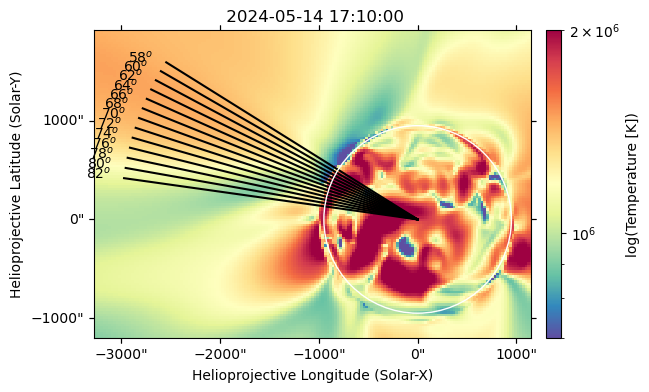

In [167]:
fig = plt.figure(figsize=[10,4])
ax  = fig.add_subplot(projection=temp)
img = temp.plot(axes=ax, norm=colors.LogNorm(vmin=7e5, vmax=2e6), cmap='Spectral_r')
temp.draw_limb()
ax.grid(False)
plt.colorbar(img, ax=ax, fraction=0.05, pad=0.02, label='log(Temperature [K])')

sampled_temp = []
sampled_dist = []

for value in centered_list:
    line = myfuncs.plot_line(angle_deg=value, length=3000, map_obj=temp)
    ax.plot_coord(line, color='black')
    # Plot the number at the end of the line
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = temp.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=temp.coordinate_frame))
    # rename the angles to be position angles, instead of geometric angles
    PA_value = value - 90
    # Display the number at the end point
    ax.text(end_point_pixel.x.value-10, end_point_pixel.y.value+2, rf'{PA_value}$^o$',
            color='black', fontsize=10, ha='center', va='center')

    # sample values along slits
    with SphericalScreen(temp.observer_coordinate):
        traced_loop_pixelated = sunpy.map.pixelate_coord_path(temp, line)
        traced_loop_distance = traced_loop_pixelated.separation(traced_loop_pixelated[0])
    vals = sunpy.map.sample_at_coords(temp, traced_loop_pixelated)
    sampled_temp.append(vals)
    sampled_dist.append(traced_loop_distance.to('arcsec'))

ax.set_xlim(left=130, right=300)
ax.set_ylim(bottom=210, top=330)
fig.tight_layout()
plt.show()

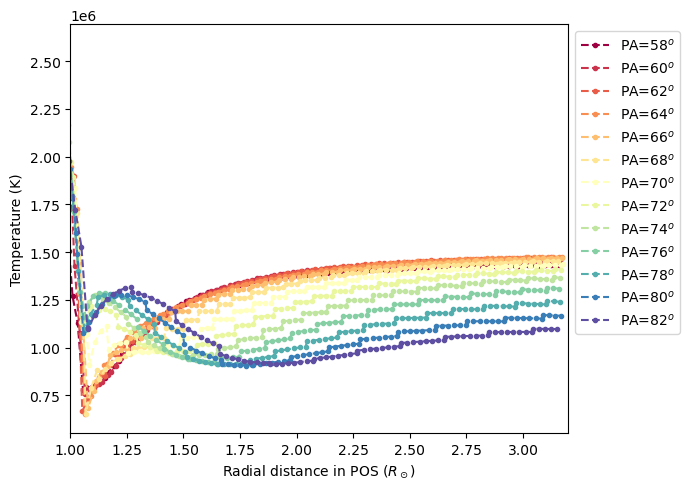

In [173]:
fig = plt.figure(figsize=[7,5])
ax  = fig.add_subplot(111)

# Choose a colormap with many distinguishable colors
cmap           = plt.cm.get_cmap('Spectral')
num_lines      = len(sampled_temp)
colors_list    = cmap(np.linspace(0, 1, num_lines))

for i in range(len(sampled_temp)):
    # rename the angles to be position angles, instead of geometric angles
    PA_value = centered_list[i] - 90
    ax.plot(sampled_dist[i]/temp.rsun_obs.value, sampled_temp[i],
            'o--', ms=3, color=colors_list[i], label=rf'PA={PA_value}$^o$')

ax.grid(False)
ax.legend(bbox_to_anchor=[1, 1])
ax.set_xlabel(r'Radial distance in POS ($R_\odot$)')
ax.set_ylabel('Temperature (K)')
ax.set_xlim(left=1, right=3.2)
fig.tight_layout()
plt.show()

In [182]:
for val in mean_per_array:
    print(f'{val:.2e}')

1.46e+06
1.48e+06
1.49e+06
1.49e+06
1.49e+06
1.47e+06
1.46e+06
1.43e+06
1.40e+06
1.37e+06
1.34e+06
1.31e+06
1.29e+06


Method 3: Band-splitting

In [ ]:
BDW  = df/f                # relative instantaneous bandwidth, from the I-LOFAR dynamic spectra
X    = (BDW + 1)**2        # compression ratio
beta = ...                 # plasma-to-magnetic pressure ratio, from the 2D plane-of-sky map of the MAS model

MA_method3 = np.sqrt( X*(X + 5 + 5*beta) / 2*(4 - X) ) # for a quasi-perpendicular shock, from Vršnak et al. (2002)

Comparison